In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("share.csv")

In [5]:
df.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [22]:
X = df['Age-Adjusted Death Rate'][:2813].values
Y = df['Lower 95% Confidence Interval for Death Rate'][:2813].values

In [28]:
X = [float(x) for x in X]
Y = [float(y) for y in Y]

In [29]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [31]:
n, d = 0, 0
for i in range(len(X)):
    n += (X[i] - X_mean)*(Y[i] - Y_mean)
    d += (Y[i] - Y_mean)**2
b1 = n/d

b0 = Y_mean - (b1*X_mean)

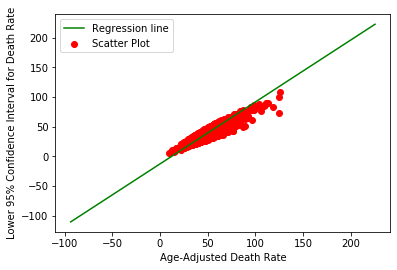

In [42]:
x_max = max(X)+100
x_min = min(Y)-100

x = np.linspace(x_min,x_max, 1400)
y = b0 + b1*x

plt.plot(x,y, color="green", label = "Regression line")
plt.scatter(X,Y, color = 'red', label = 'Scatter Plot')
plt.xlabel("Age-Adjusted Death Rate")
plt.ylabel('Lower 95% Confidence Interval for Death Rate')
plt.legend()
    

In [43]:
rmse = 0
for i in range(len(X)):
    y_pred = b0 + b1*X[i]
    rmse += (y_pred - Y[i])**2
rmse = np.sqrt(rmse/len(X))
print('RMSE: ', rmse)

RMSE:  5.8057866445824


In [44]:
# Check by giving some value
x1 = 300
print("Assumed Value: ",x1)
print("Result: ",b0+b1*x1)

Assumed Value:  300
Result:  300.3425191876166
